# Arenstorf Orbit

$$
\begin{split}
y_1'' &= y_1 + 2y_2' - (1-\mu)\frac{y_1+\mu}{A}-\mu\frac{y_1-(1-\mu)}{B} \\
y_2'' &= y_2 - 2y_1'-(1-\mu)\frac{y_2}{A} - \mu\frac{y_2}{B}
\end{split}
$$
with the constants
$$
\begin{split}
A &= \Big((y_1+\mu)^2 + y_2^2\Big)^{3/2} \\
B &= \Big((y_1-(1-\mu))^2 - y_2^2\Big)^{3/2}
\end{split}
$$
and mass ratio
$$
\mu = \frac{m_m}{m_m + m_e} 
$$



In [8]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from explicit_integration import *

# define ODE
def dydt(t, y):

    mu = 0.012277471      # relative mass of moon w.r.t. global mass
    mup = 1 - mu          # relative mass of earth w.r.t. global mass
    
    y1 = y[0]   # y1 coordinate
    y2 = y[2]   # y2 coordinate
    
    A = ((y1 + mu)**2 + y2**2)**1.5
    B = ((y1 - mup)**2 + y2**2)**1.5
    
    f = np.zeros(4)
    f[0] = y[1]
    f[1] = y1 + 2*y[3] - mup*(y1 + mu)/A - mu*(y1 - mup)/B
    f[2] = y[3]
    f[3] = y2 - 2*y[1] - mup*y2/A - mu*y2/B
    
    return f





Initial conditions:
$$
y_1(0) = 0.994 \quad \mathrm \quad \dot{y}_2(0) = -2.00158510637908252240537862224
$$

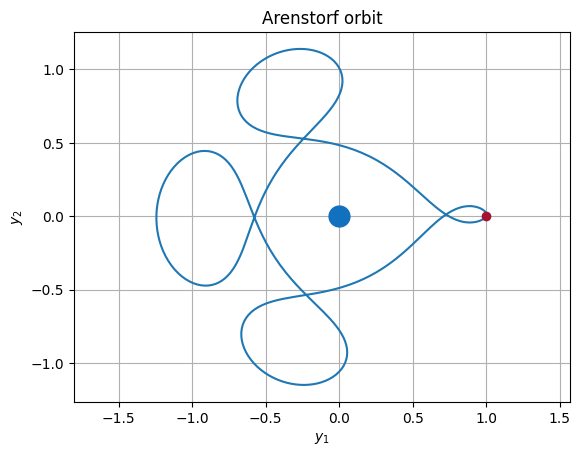

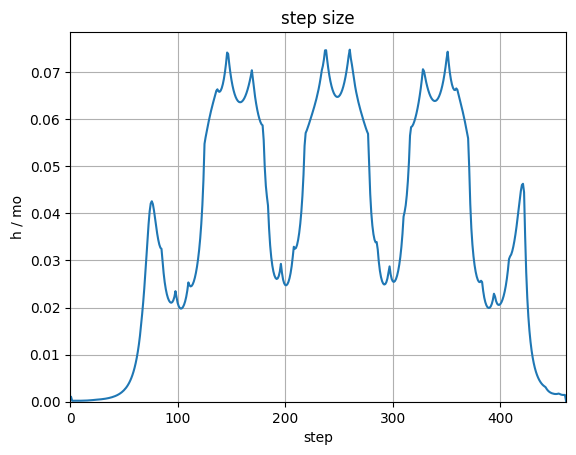

In [20]:
# time span in months
t_span = (0, 17.0652165601579625588917206249)

# initial conditions
y0 = [0.994, 0, 0, -2.00158510637908252240537862224]

# solve ivp
n = 10000
#t, y = Runge_Kutta_4(dydt, t_span, y0, n)
#y = y.T

t, y = Euler_Richardson(dydt, t_span, y0, 1E-3, TOL = 1E-3)
y = y.T

# use Runge Kutta (similar to ODE45 in MatLab)
#sol = solve_ivp(dydt, t_span, y0, method='RK45')
#y = sol.y
#t = sol.t

# plot result
h = np.diff(t)
n = len(h)
plt.plot(y[0,:], y[2,:])
plt.plot(0, 0, 'o', markersize=15, color=[0.0667,0.4431,0.7451]) 
plt.plot(1, 0, 'o', markersize=6, color=[0.6353,0.0784,0.1843]) 
plt.axis('equal')
plt.grid()
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Arenstorf orbit')
plt.show()

# plot size of time steps
plt.plot(np.arange(1, n + 1), h)
plt.grid()
plt.xlabel('step')
plt.ylabel('h / mo')
plt.title('step size')
plt.xlim((0, n))
plt.ylim(bottom=0)
plt.show()